# Importing dependencies

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

from sklearn import datasets
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings("ignore")

# Generating random dataset for regression

In [71]:
# Generating random dataset for regression
X,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=13)

# Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [74]:
X_train.shape, X_test.shape

((75, 1), (25, 1))

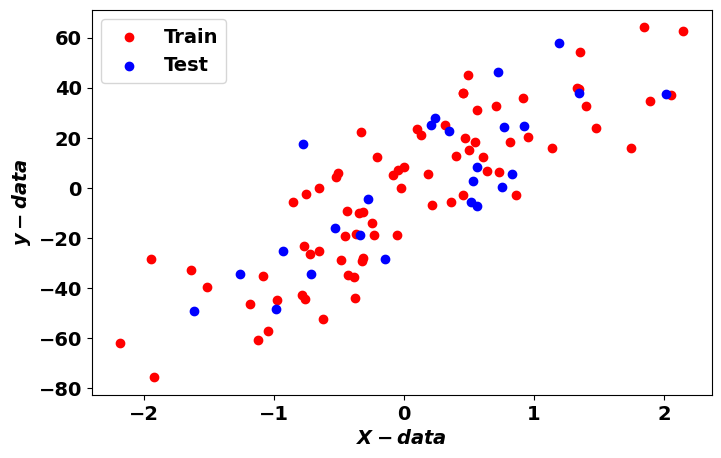

In [99]:
plt.scatter(X_train,y_train,color="r")
plt.scatter(X_test,y_test,color="b")
plt.xlabel("$X-data$")
plt.ylabel("$y-data$")
plt.legend(["Train","Test"])

# Coding linear regression without library

In [129]:
class LinearRegression:
    def __init__(self,LR=0.01,n_iters=1000):
        self.LR = LR              #  Learning rate
        self.n_iters = n_iters    #  Number of iterations
        self.weights = None       #  Weight parameter 
        self.bias = None          #  Bias parameter
        
    def fit(self,X,y):
        
        n_samples,n_features = X.shape          #  Number of observation , number of features 
        self.weights = np.zeros(n_features)     #  Initialize weights to zero
        self.bias = 0                           #  Initialize bias to zero
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T,(y_pred-y))    #  Derivation of cost function w.r.t to weights
            db = (1/n_samples) * np.sum(y_pred-y)          #  Derivation of cost function wrt to bias
            self.weights = self.weights - self.LR * dw     #  Update the weights
            self.bias = self.bias - self.LR*db             #  Update the bias
            
            
    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias        #  y_pred = w.x + b
        return y_pred
    
def MSE(y_test,y_pred):                                   #  MEAN SQUARED ERROR
    return np.mean((y_test,y_pred)**2)

Text(0, 0.5, '$y-data$')

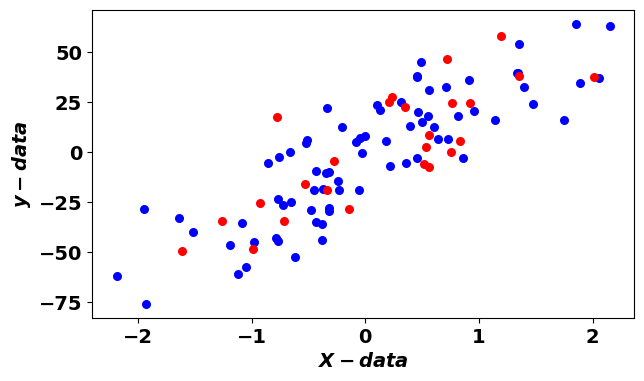

In [130]:
plt.figure(figsize=(7,4))


plt.scatter(X_train,y_train,color="b",marker="o",s=30)
plt.scatter(X_test,y_test,color="r",marker="o",s=30)

plt.xlabel("$X-data$")
plt.ylabel("$y-data$")

In [131]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [132]:
mse_val = mse(y_test,y_pred)
mse_val

294.2339463464015

In [133]:
rmse_val = rmse(y_test,y_pred)
rmse_val

17.1532488568901

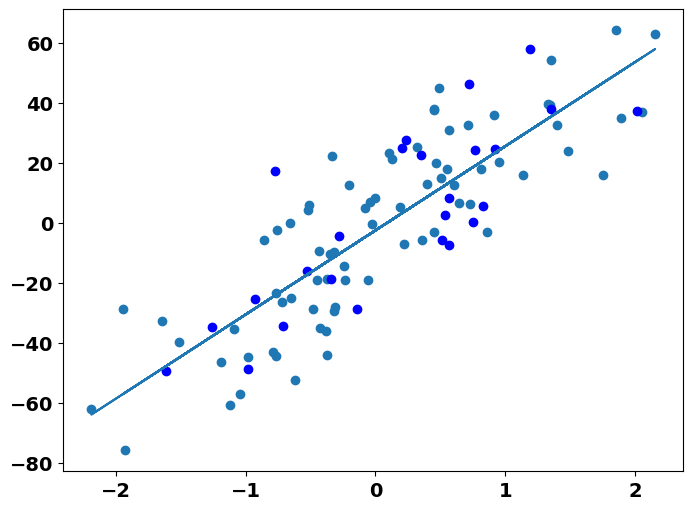

In [134]:
plt.figure(figsize=(8,6))
y_pred_line = reg.predict(X)
m1 = plt.scatter(X_train,y_train,cmap="r")
m2 = plt.scatter(X_test,y_test,color="b")
plt.plot(X,y_pred_line)

In [135]:
y[23]

62.82167059557334

In [136]:
reg.predict(X[23])

57.87406392452905

In [142]:
np.dot(reg.weights,X[23]) + reg.bias

57.87406392452905

In [137]:
mse(y[23],reg.predict(X[23]))

24.47881177136197